# 10 LEO

 Checking the CRIRES-POP spectra of 10LEO for spectral mis-match at 2-2 nanometers
 
 The resolution of the final CRIRES-POP spectrum is 90000. 

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = "/home/jneal/Phd/data/crires-pop data/K_HD83240/"
import glob
k_fits = glob.glob(files + "*.fits")

print(k_fits)


['/home/jneal/Phd/data/crires-pop data/K_HD83240/CR_SEXT_390582_2010-01-07T06:56:28.590_DIT30_2055.2nm.fits', '/home/jneal/Phd/data/crires-pop data/K_HD83240/CR_SEXT_390583_2010-01-06T08:25:04.207_DIT30_2267.2nm.fits', '/home/jneal/Phd/data/crires-pop data/K_HD83240/CR_SEXT_390582_2010-01-07T06:51:34.908_DIT30_1984.3nm.fits', '/home/jneal/Phd/data/crires-pop data/K_HD83240/CR_SEXT_390584_2009-12-03T05:54:38.392_DIT30_2368.7nm.fits', '/home/jneal/Phd/data/crires-pop data/K_HD83240/CR_SEXT_390583_2010-01-06T08:10:15.461_DIT30_2425.9nm.fits', '/home/jneal/Phd/data/crires-pop data/K_HD83240/CR_SEXT_390584_2009-12-03T06:14:44.642_DIT30_2510.0nm.fits', '/home/jneal/Phd/data/crires-pop data/K_HD83240/CR_SEXT_390584_2009-12-03T06:00:38.505_DIT30_2398.1nm.fits', '/home/jneal/Phd/data/crires-pop data/K_HD83240/CR_SEXT_390582_2009-12-02T06:34:38.930_DIT30_2146.6nm.fits', '/home/jneal/Phd/data/crires-pop data/K_HD83240/CR_SEXT_390582_2010-01-07T06:39:07.170_DIT30_2024.3nm.fits', '/home/jneal/Phd/d

In [3]:
hdr = fits.getheader(k_fits[0])
data= fits.getdata(k_fits[0])
print(data.columns)

ColDefs(
    name = 'Extracted_RECT'; format = '1D'
    name = 'Extracted_OPT'; format = '1D'
    name = 'Error_RECT'; format = '1D'
    name = 'Error_OPT'; format = '1D'
    name = 'Weight_Norm_RECT'; format = '1D'
    name = 'Weight_Norm_OPT'; format = '1D'
    name = 'Background_noise'; format = '1D'
    name = 'Wavelength'; format = '1D'
    name = 'Wavelength_model'; format = '1D'
)


In [4]:
hdr
#  SLIT1 WID = 0.2 arcsec  -> RESOLUTION = 100,000

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2010-01-13T20:01:50' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO-Paranal'        / Source of the file                             
TELESCOP= 'ESO-VLT-U1'         / Telescope name                                 
INSTRUME= 'CRIRES  '           / Instrument name                                
OBJECT  = 'HD-83240'           / Content description                            
RA      =           144.301955 / 09:37:12.4 RA (J2000) pointing (deg)           
DEC     =              6.837

<IPython.core.display.Javascript object>


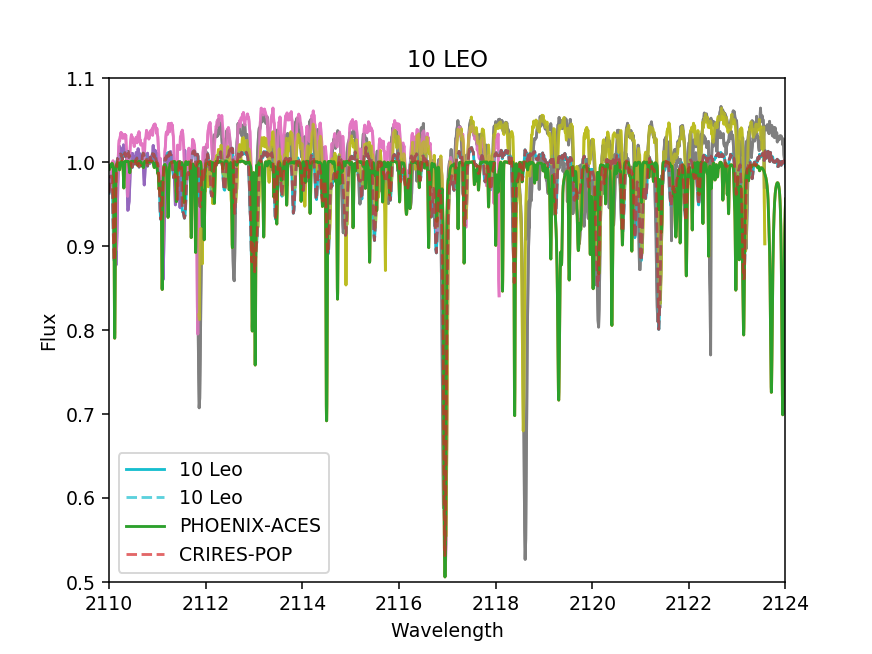

(0.5, 1.1)

In [5]:
%matplotlib notebook
for spec in k_fits:
    data = fits.getdata(spec)
    plt.plot(data["Wavelength"], data["Extracted_OPT"]/np.mean(data["Extracted_OPT"]))
    
plt.xlim(2100, 2130)
plt.ylim(0.5, 1.1)

# Fully reduced K-band


In [6]:

wav, flux = np.loadtxt("/home/jneal/Phd/data/crires-pop data/10LeoKband",unpack=True)
wav *= 1000
plt.plot(wav, flux, label="10 Leo")
plt.show()

In [7]:
# Parts wth combined

for spec in k_fits:
    data = fits.getdata(spec)
    plt.plot(data["Wavelength"], data["Extracted_OPT"]/np.mean(data["Extracted_OPT"]), alpha = 0.7)
plt.plot(wav, flux, label="10 Leo", alpha = 0.7, linestyle="--")    
plt.xlim(2100, 2130)
plt.ylim(0.5, 1.1)
plt.legend()

# PHOENIX ACES MODEL

In [8]:

# temp 4803, logg =2.59  feh= 0.05   # From simbad

phoenix_model = "/home/jneal/Phd/data/PHOENIX-ALL/PHOENIX/Z-0.0/lte04800-3.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"

model_wl = fits.getdata("/home/jneal/Phd/data/PHOENIX-ALL/PHOENIX/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits")
model = fits.getdata(phoenix_model)

model_wl /= 10
mask = (model_wl > 2100) * (model_wl< 2200)
model_wl, model = model_wl[mask], model[mask]
plt.plot(model_wl, model)
plt.show()

In [13]:
from spectrum_overload.spectrum import Spectrum

In [14]:

model_spec = Spectrum(xaxis=model_wl, flux=model*model_wl)

<IPython.core.display.Javascript object>


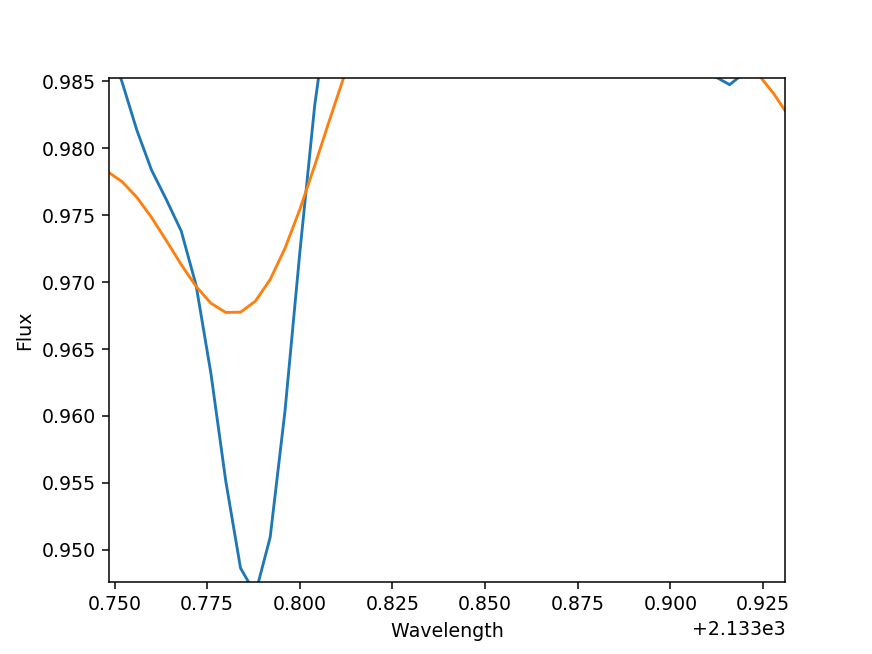

In [16]:
norm_model = model_spec.normalize(method="linear")
norm_model.plot()

norm_broad_model = norm_model.instrument_broaden(R=90000)
norm_broad_model.plot()

In [22]:
# 10 LEO with PHOENIX-ACES

mask_10leo = (wav > 2100) * (wav< 2200)

wav_10leo, flux_10leo = wav[mask_10leo], flux[mask_10leo]

norm_broad_model.plot(label="PHOENIX-ACES")
plt.plot(wav_10leo, flux_10leo, label="CRIRES-POP", alpha = 0.7, linestyle="--")    
plt.title("10 LEO")
plt.legend()
plt.xlim(2110, 2160)

(2110, 2160)

In [ ]:
%matplotlib inline
# Paper like wavelengths
# 10 LEO with PHOENIX-ACES
mask_10leo = (wav > 2100) * (wav< 2200)
wav_10leo, flux_10leo = wav[mask_10leo], flux[mask_10leo]

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
ax1.plot(wav_10leo, flux_10leo, label="CRIRES-POP")  
norm_broad_model.plot(axis=ax1, label="PHOENIX-ACES", alpha = 0.7, linestyle="--")
ax1.set_xlim(2112, 2124)
plt.label("Normalized Flux")
plt.label("Wavelength (nm)")
plt.legend()


ax2 = plt.subplot(222)
ax2.plot(wav_10leo, flux_10leo, label="CRIRES-POP")  
norm_broad_model.plot(axis=ax2, label="PHOENIX-ACES", alpha = 0.7, linestyle="--")
ax2.set_xlim(2127, 2137)
plt.label("Normalized Flux")
plt.label("Wavelength (nm)")
plt.legend()

ax3 = plt.subplot(223)
ax3.plot(wav_10leo, flux_10leo, label="CRIRES-POP")  

norm_broad_model.plot(axis=ax3, label="PHOENIX-ACES", alpha = 0.7, linestyle="--")
ax3.set_xlim(2143, 2153)
plt.label("Normalized Flux")
plt.label("Wavelength (nm)")
plt.legend()

ax4 = plt.subplot(224)
ax4.plot(wav_10leo, flux_10leo, label="CRIRES-POP")  
norm_broad_model.plot(axis=ax4, label="PHOENIX-ACES", alpha = 0.7, linestyle="--")
ax4.set_xlim(2156, 2165)
plt.label("Normalized Flux")
plt.label("Wavelength (nm)")
plt.legend()
plt.suptitle("10 LEO")

